In [ ]:
import pandas as pd
supermkt_df = pd.read_csv('https://bit.ly/3lLgXwC')
supermkt_df.head()

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax_5_perc,total,date,time,payment,cost_of_goods_sold,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Mobile Money,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Debit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Mobile Money,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Mobile Money,604.17,4.761905,30.2085,5.3


In [25]:
#Check number of records and columns
supermkt_df.shape

(1000, 16)

In [31]:
#Check for duplicated values
supermkt_df.duplicated().sum()

0

In [35]:
#Check for missing values
supermkt_df.isnull().sum()

invoice_id                 0
branch                     0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5_perc                 0
total                      0
date                       0
time                       0
payment                    0
cost_of_goods_sold         0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

In [36]:
#Checking for variable type
supermkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   customer_type            1000 non-null   object 
 3   gender                   1000 non-null   object 
 4   product_line             1000 non-null   object 
 5   unit_price               1000 non-null   float64
 6   quantity                 1000 non-null   int64  
 7   tax_5_perc               1000 non-null   float64
 8   total                    1000 non-null   float64
 9   date                     1000 non-null   object 
 10  time                     1000 non-null   object 
 11  payment                  1000 non-null   object 
 12  cost_of_goods_sold       1000 non-null   float64
 13  gross_margin_percentage  1000 non-null   float64
 14  gross_income             

In [ ]:
# Total cost of goods in the supermarket branches
# unique branches
supermkt_df['branch'].unique()

supermkt_df['cost_of_goods_sold'].groupby(supermkt_df['branch']).sum()

branch
A    101143.21
B    101140.64
C    105303.53
Name: cost_of_goods_sold, dtype: float64

In [37]:
# Sales by product line
supermkt_df['total'].groupby(supermkt_df['product_line']).sum().sort_values(ascending=0)

product_line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: total, dtype: float64

In [ ]:
#Top selling product based on quantity
supermkt_df['quantity'].groupby(supermkt_df['product_line']).sum().sort_values(ascending=False)

product_line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: quantity, dtype: int64

In [ ]:
#Average rating given by customers
supermkt_df['rating'].mean()

6.9727

In [ ]:
# Average rating by customer gender
supermkt_df['rating'].groupby(supermkt_df['gender']).mean()

gender
Female    6.964471
Male      6.980962
Name: rating, dtype: float64

In [ ]:
#Aggregate of totals based on customer type and gender
pd.pivot_table(supermkt_df, index=['customer_type', 'gender'], aggfunc={'total': [min, max, sum]})

total                     
                          max      min         sum
customer_type gender                              
Member        Female  1042.65  13.1670  88146.9435
              Male     950.25  10.6785  76076.5005
Normal        Female  1022.49  12.6945  79735.9815
              Male    1039.29  13.4190  79007.3235

In [56]:
#Determine most common type of payment
supermkt_df['payment'].value_counts()

payment
Mobile Money    345
Cash            344
Debit card      311
Name: count, dtype: int64

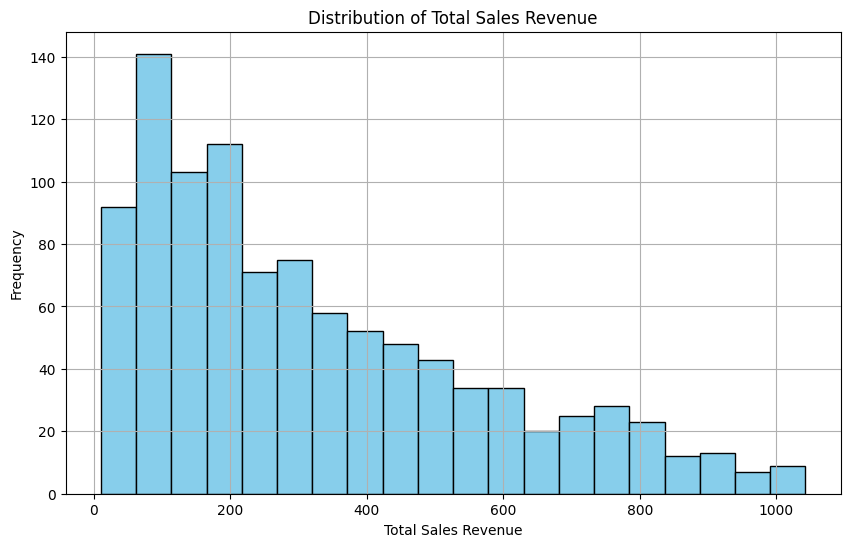

In [ ]:
#visualize the distribution of total sales
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(supermkt_df['total'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Total Sales Revenue')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [24]:
#Numerical variables summary
supermkt_df.describe()

,unit_price,quantity,tax_5_perc,total,cost_of_goods_sold,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


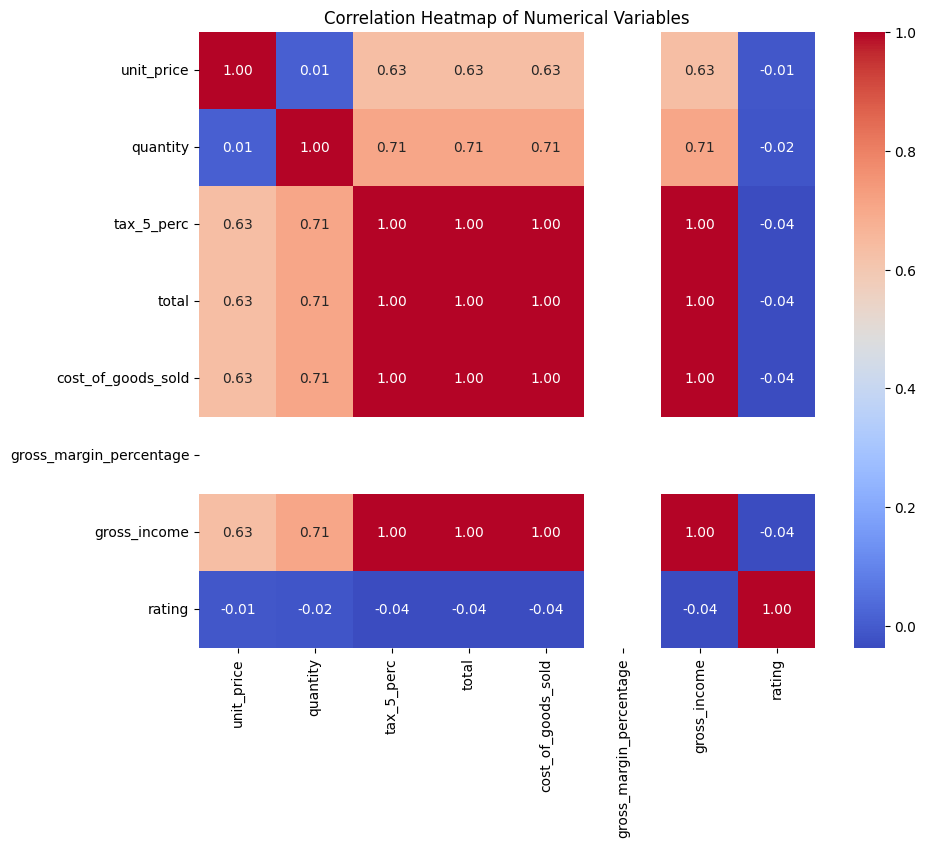

In [64]:
import seaborn as sns
# Select numerical variables for correlation analysis
numerical_vars = ['unit_price', 'quantity', 'tax_5_perc' ,'total', 'cost_of_goods_sold','gross_margin_percentage', 'gross_income','rating']

# Compute the correlation matrix
correlation_matrix = supermkt_df[numerical_vars].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [54]:
#Number of customer type
supermkt_df['customer_type'].value_counts()

customer_type
Member    501
Normal    499
Name: count, dtype: int64

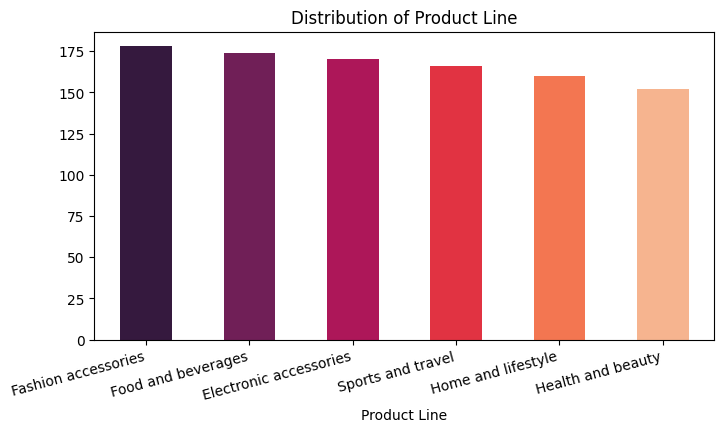

In [59]:
# exploring the 'product_line' variable
plt.figure(figsize = (8, 4))
supermkt_df.product_line.value_counts().plot(kind = 'bar', rot = 15,
                                    color = sns.color_palette('rocket', supermkt_df.product_line.nunique()))
plt.xlabel('Product Line')
plt.title('Distribution of Product Line')
plt.xticks(ha = 'right')
plt.show()

In [62]:
#Product line counts
supermkt_df['product_line'].value_counts()

product_line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

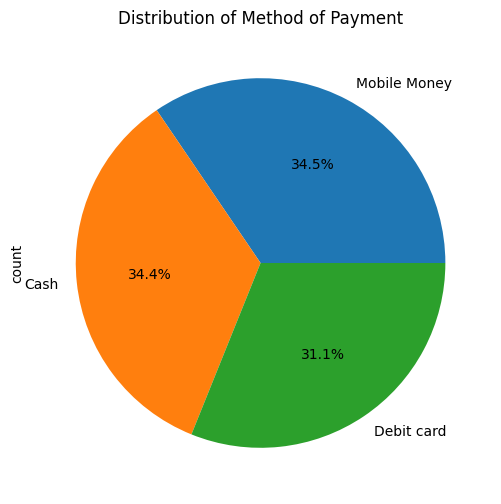

In [60]:
# exploring the 'payment' variable
plt.figure(figsize = (8, 6))
supermkt_df.payment.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of Method of Payment')
plt.show()